In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Accedemos al archivo de *Accesos por tecnologías*.

In [2]:
axt = pd.read_csv('../data/Accesos Por Tecnología.csv')

### Análisis del Crecimiento Total de Conectividades por Año
El análisis tiene por objetivo entender cómo evoluciona el número de conexiones de internet en Argentina con el correr de los años, abarcando tecnologías como ADSL, Cablemódem, Fibra Óptica, Wireless, y otras. Esto nos permite observar tendencias sin ser afectados por distorsiones en los ingresos provocadas por la alta inflación en Argentina.

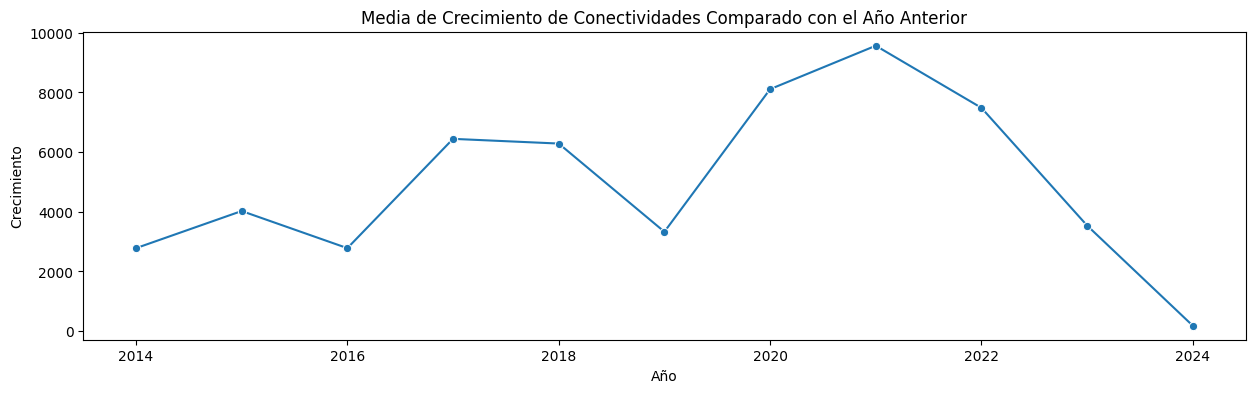

In [3]:
# Agrupar por provincia y año y calcular la suma total de conexiones
total_x_prov = axt.groupby(['Provincia', 'Año', 'Trimestre']).agg({'Total': 'sum'}).reset_index()
# Calcular el crecimiento de conexiones por provincia
total_x_prov['Crecimiento'] = total_x_prov.groupby('Provincia')['Total'].diff()

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov, x='Año', y='Crecimiento', marker='o', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior', fontsize=12)

plt.show()


## Conclusiones del análisis:
- **Tendencia Cíclica:** El crecimiento de conexiones muestra un patrón cíclico, con aumentos sostenidos en preíodos aproximados de dos años de duración y posteriores descensos en las mismas.

- **Relación con la pandemia de COVID-19:** Se observa un notable aumento en 2020-2021, probablemente impulsado por la pandemia y el incremento en la demanda de conectividad debido a la digitalización y el trabajo remoto.

- **Situación Actual:** El crecimiento de conectividad en 2024 se mantiene al nivel de 2015, sugiriendo una estabilización en comparación con los picos anteriores.

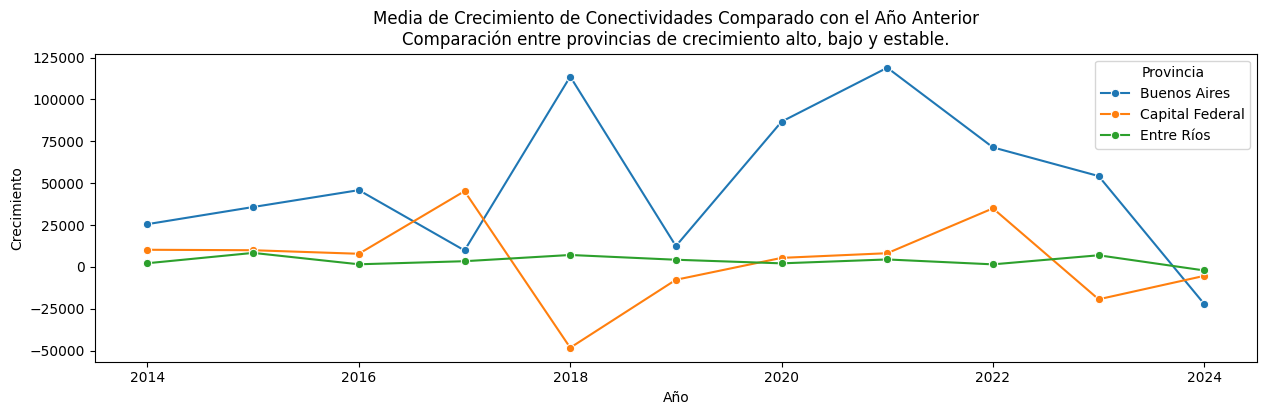

In [4]:
# Filtrar los datos para solo incluir outliers. Pude encontrar estos datos con un (hue='Provincia') en el grafico anterior.
total_x_prov_filtrado = total_x_prov[total_x_prov['Provincia'].isin(['Buenos Aires', 'Entre Ríos','Capital Federal'])]

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov_filtrado, x='Año', y='Crecimiento', marker='o', hue='Provincia', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior\nComparación entre provincias de crecimiento alto, bajo y estable.', fontsize=12)

plt.show()

## Conclusiones del Análisis de Crecimiento de Conexiones por provincias.
- **Buenos Aires, Un Escenario Estratégico para la Expansión de la Conectividad:** La provincia de Buenos Aires ha sido líder en el desarrollo de la conectividad a nivel nacional, registrando incrementos significativos en 2018 y durante la pandemia, consolidándose como un punto clave para la expansión del acceso a internet. Actualmente, el crecimiento se encuentra en niveles comparables a los de 2016, tras haber atravesado tres años consecutivos de contracción, situándose en una posición equivalente a la de la Ciudad Autónoma de Buenos Aires. Esta estabilización abre una ventana de oportunidad para impulsar nuevamente el crecimiento, y próximamente se analizarán las tecnologías de conectividad con mayor potencial para esta reactivación.

- **Correlación Inversa con Capital Federal:** A diferencia de Buenos Aires, Capital Federal muestra una correlación inversa en el crecimiento de conectividad. Mientras Buenos Aires crece, Capital Federal experimenta descensos marcados, sugiriendo que cuando una aumenta su conectividad, la otra tiende a disminuir.

- **Estabilidad en Entre Ríos:** Entre Ríos muestra un comportamiento estable en el tiempo, sin variaciones notables, lo que indica un mercado maduro sin grandes fluctuaciones en su conectividad.

- **Oportunidades de Crecimiento en Otras Provincias:** Otras provincias, como Córdoba y Mendoza, han mostrado un crecimiento moderado en la conectividad, lo que sugiere que existen oportunidades para implementar mejoras en infraestructura y servicios. Estas regiones podrían beneficiarse de inversiones estratégicas que fomenten la expansión de redes y el acceso a internet, alineándose con el modelo de crecimiento observado en Buenos Aires.

## Comparativa de las tecnologías en estas provincias.

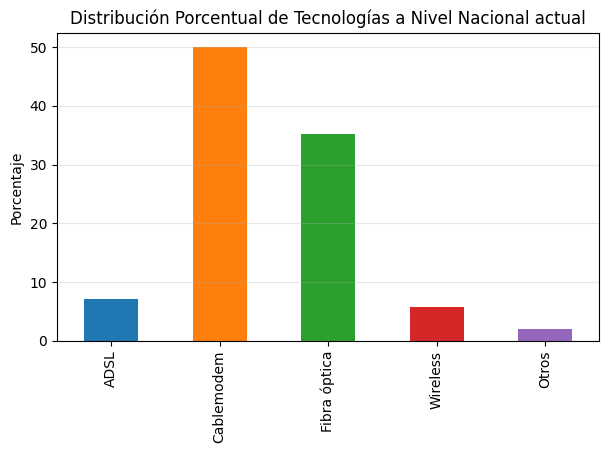

In [5]:
# Calcular los porcentajes de cada tecnología respecto al Total
actual = axt[axt['Año'] == 2024]

total_nacional = actual[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
total_general = actual['Total'].sum()
total_nacional_percent = (total_nacional / total_general) * 100

# Crear gráfico de barras con tecnologias sobre el total.
fig, ax = plt.subplots(figsize=(7, 4))

total_nacional_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_title('Distribución Porcentual de Tecnologías a Nivel Nacional actual', fontsize=12)
ax.set_ylabel('Porcentaje')

plt.grid(axis='y', alpha=0.3)
plt.show()

## Conclusiones de la comparativa.

- **Predominio del Cablemodem y Fibra Óptica:** La conectividad en Argentina está altamente concentrada en dos tecnologías: Cablemodem >(50%) y Fibra Óptica (33%). Esto sugiere que cualquier inversión o estrategia de expansión debe priorizar estas tecnologías.

- **Wireless y Otros:** Aunque Wireless y Otros suman apenas un 8% combinado, este segmento puede ofrecer otras oportunidades, especialmente en zonas rurales o de difícil acceso, donde las infraestructuras tradicionales son menos viables.

**Recomendaciones:**
La tendencia clara es que el futuro de la conectividad en Argentina está en la expansión de la Fibra Óptica y el fortalecimiento de la red de Cablemodem. Se debe minimizar la inversión en ADSL y buscar oportunidades en Wireless para regiones menos accesibles. Las empresas deben enfocar su infraestructura y políticas comerciales en alinearse con esta evolución tecnológica.

## Análisis de las distintas tecnologías en la actualidad.

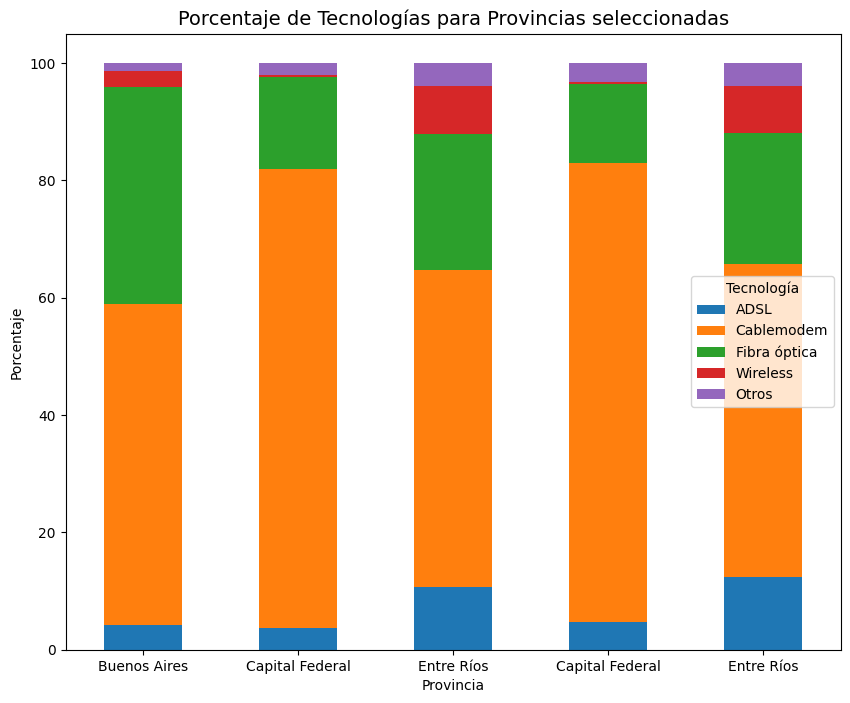

In [6]:
# Mantener la columna 'Provincia' en el DataFrame antes de calcular los porcentajes
df_percent = actual[['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].copy()
# Calcular los porcentajes de cada tecnología respecto al Total
df_percent[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']] = df_percent[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].div(actual['Total'], axis=0) * 100
provincias_interes = ['Buenos Aires', 'Capital Federal', 'Entre Ríos']
df_filtrado = df_percent[df_percent['Provincia'].isin(provincias_interes)]
# Establecer 'Provincia' como índice para que se muestre en el eje x
df_filtrado.set_index('Provincia', inplace=True)


# Crear gráfico de barras apiladas con tecnologias sobre el total de las provincias seleccionadas.
fig, ax = plt.subplots(figsize=(10,8))

df_filtrado.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Tecnologías para Provincias seleccionadas', fontsize=14)
ax.set_ylabel('Porcentaje')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.legend(title='Tecnología')

plt.show() 

## Conclusiones del análisis.

**Buenos Aires:** La alta proporción de Cablemodem destaca una infraestructura estable pero que podría beneficiarse de una modernización en la expansión de Fibra óptica y Wireless. La actualización hacia tecnologías más modernas no solo optimizará la red, sino que también podría atraer nuevos negocios y fomentar el desarrollo en áreas rurales.

**Capital Federal:** Aunque Cablemodem y ADSL siguen siendo predominantes, hay una necesidad de incrementar la Fibra óptica. La modernización de la infraestructura con estas tecnologías avanzadas permitirá a Capital Federal mantener su liderazgo en conectividad, mejorar la experiencia del usuario y sostener el ritmo con las tendencias globales de tecnología. Un incremento estratégico en Fibra óptica y Wireless también ayudará a abordar las crecientes expectativas de una población altamente urbana y tecnológica.

**Entre Ríos:** La dependencia de ADSL y Cablemodem revela la necesidad de actualización tecnológica para mantenerse al día con las tendencias del mercado. Invertir en Fibra óptica es esencial para mejorar la capacidad y la calidad de la conectividad en la provincia, promoviendo un crecimiento económico sostenido. Además, expandir la cobertura de Wireless en áreas rurales puede cerrar la brecha en conectividad y fomentar un desarrollo más equitativo en la región.

## Análisis de la evolución de tecnologías.

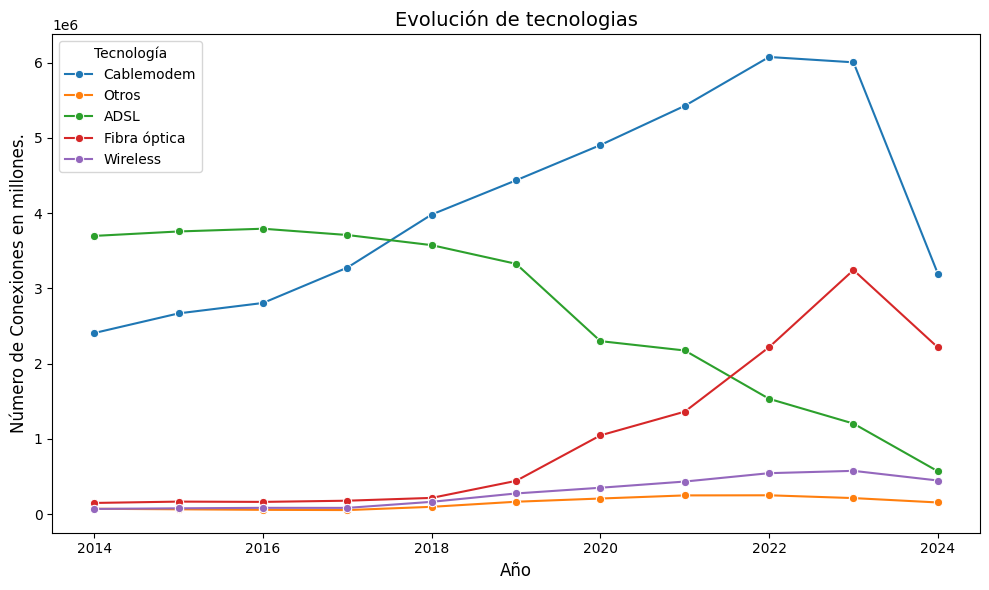

In [7]:
# Agrupar los datos por Año, Trimestre y sumar los valores de Cablemodem y Fibra óptica a nivel nacional
primer = axt[axt['Trimestre'] == 1]
df_nacional = primer.groupby(['Año'])[['Cablemodem', 'Fibra óptica','Otros','Wireless', 'ADSL']].sum().reset_index()


# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_nacional, x='Año', y='Cablemodem', marker='o', label='Cablemodem', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Otros', marker='o', label='Otros', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='ADSL', marker='o', label='ADSL', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Fibra óptica', marker='o', label='Fibra óptica', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Wireless', marker='o', label='Wireless', ax=ax)


# Configurar el gráfico
ax.set_title('Evolución de tecnologias', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Conexiones en millones.', fontsize=12)
ax.legend(title='Tecnología')

plt.tight_layout()
plt.show()

## Conclusiones sobre la Evolución de Tecnologías

**Cablemodem:** Aunque Cablemodem ha liderado el crecimiento desde 2017, su estabilización desde 2022 sugiere un posible punto de saturación en el mercado. Esta tecnología podría estar llegando a su límite de adopción, lo que indica que futuras inversiones en su expansión podrían no generar el mismo retorno que en años anteriores.

**Fibra Óptica:** Desde 2018, la Fibra óptica ha mostrado un crecimiento sostenido, y en 2022 superó a ADSL, colocándose como una tecnología clave para el futuro. Su tendencia ascendente la posiciona como una opción viable para sustituir otras tecnologías en declive, ofreciendo mayor calidad y velocidad de conexión.

**ADSL:** El marcado descenso de ADSL refleja su obsolescencia, alcanzando niveles cercanos a los de Wireless. Este declive indica que los usuarios están migrando hacia tecnologías más rápidas y eficientes.

**Recomendación:** Las proyecciones indican que la Fibra óptica podría alcanzar o incluso superar a Cablemodem en los próximos años, esto abre una clara oportunidad. Invertir en esta tecnología permitirá a las empresas anticiparse a la evolución del mercado y mantenerse competitivas en un entorno de demanda creciente por servicios de alta velocidad.

## Análisis de accesos a dial-up

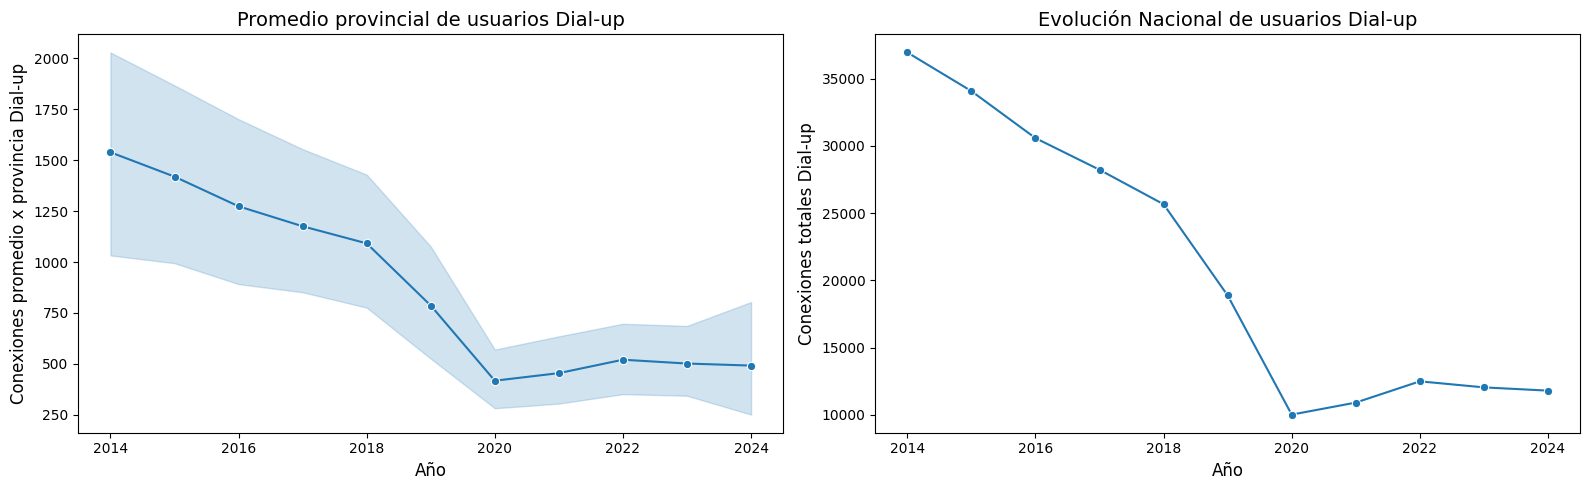

In [8]:
dial = pd.read_csv('../data/Dial-BAf.csv')
dial_total = pd.read_csv('../data/Totales Dial-BAf.csv')

# Crear el gráfico de líneas
fig, ax = plt.subplots(1,2,figsize=(16, 5))

sns.lineplot(data=dial, x='Año', y='Dial up', marker='o', ax=ax[0])
# Configurar el gráfico
ax[0].set_title('Promedio provincial de usuarios Dial-up', fontsize=14)
ax[0].set_xlabel('Año', fontsize=12)
ax[0].set_ylabel('Conexiones promedio x provincia Dial-up', fontsize=12)

sns.lineplot(data=dial_total, x='Año', y='Dial up', marker='o', ax=ax[1], errorbar=None)
# Configurar el gráfico
ax[1].set_title('Evolución Nacional de usuarios Dial-up', fontsize=14)
ax[1].set_xlabel('Año', fontsize=12)
ax[1].set_ylabel('Conexiones totales Dial-up', fontsize=12)

plt.tight_layout()
plt.show()

## Conclusiones de Accesos Dial up.

**Declive Sostenido de usuarios de Dial-Up:** Aunque el acceso Dial-Up ha disminuido drásticamente desde 2014, su estabilización en torno a 12.000 usuarios desde 2020 sugiere una demanda persistente, principalmente en áreas con infraestructura limitada. A pesar de su declive, este grupo sigue dependiendo de la tecnología, por lo que no debe ser ignorado.

**Transición a tecnologías de acceso más avanzadas:** La estabilización tras el declive en el número de usuarios representa una oportunidad para impulsar la adopción de Banda Ancha Fija y Móvil. Fomentar la migración hacia infraestructuras más avanzadas, como fibra óptica o wireless, optimizaría la conectividad y favorecería el desarrollo, especialmente en áreas con menor acceso.

**Impacto en la Economía Local:** La modernización de la infraestructura de internet no solo beneficiaría a los usuarios individuales, sino que también podría tener un efecto positivo en la economía local. Al mejorar el acceso a internet, se fomentaría el desarrollo de pequeñas empresas y se facilitaría la educación en línea, contribuyendo así al crecimiento económico en estas áreas.

**Desafíos en la Migración:** Sin embargo, la migración de usuarios de Dial-Up a tecnologías más avanzadas presenta desafíos significativos, incluyendo la falta de educación digital y la resistencia al cambio. Es crucial implementar programas de sensibilización y capacitación que faciliten esta transición, asegurando que los usuarios comprendan los beneficios de las nuevas tecnologías

## Análisis de las provincias con mayor acceso a Dial-up.

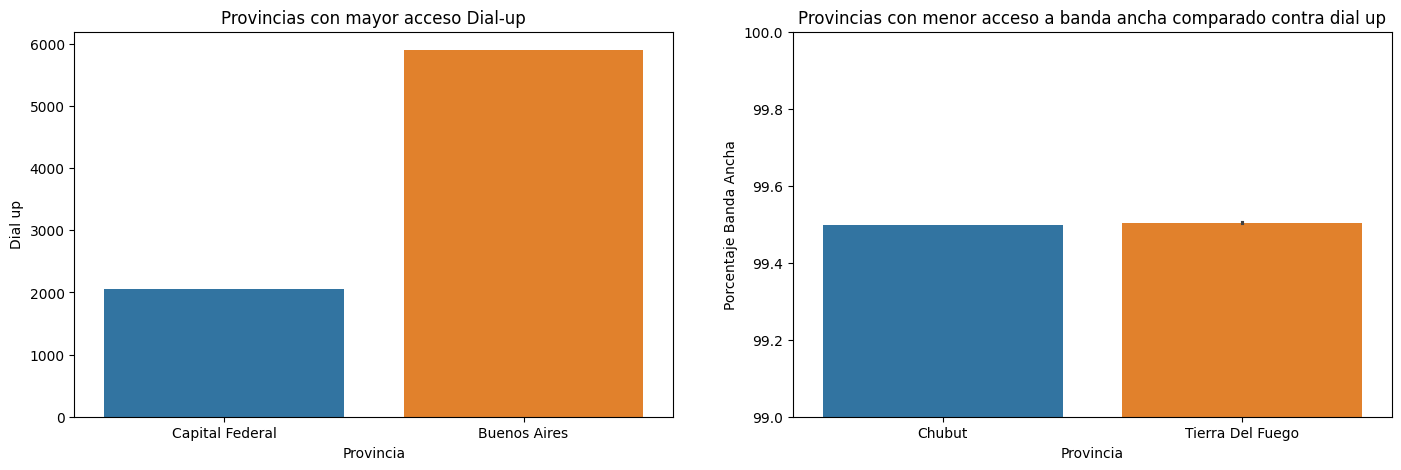

In [9]:
actual = dial[dial['Año'] == 2024]

actual_d = actual.sort_values(by='Dial up')
actual_d = actual_d.tail(5)

actual_b = actual.copy()
actual_b.loc[:, 'Porcentaje Banda Ancha'] = actual_b['Banda ancha fija'] / (actual_b['Banda ancha fija'] + actual_b['Dial up']) * 100
banda = actual_b.sort_values(by='Porcentaje Banda Ancha')
banda = banda.head(5)


# Crear el gráfico de líneas
fig, ax = plt.subplots(1,2, figsize=(17,5))

sns.barplot(data=actual_d, x='Provincia', y='Dial up', hue='Provincia', ax=ax[0])
ax[0].set_title('Provincias con mayor acceso Dial-up', fontsize=12)

sns.barplot(data=banda, x='Provincia', y='Porcentaje Banda Ancha',hue='Provincia', ax=ax[1])
ax[1].set_title('Provincias con menor acceso a banda ancha comparado contra dial up', fontsize=12)
ax[1].set_ylim(99, 100)

plt.show()

## Conclusiones de accesos por Provincias.

**Persistencia del Dial-Up: Oportunidades de Expansión:** A pesar del liderazgo de Buenos Aires en tecnologías avanzadas como Cablemodem y Fibra óptica, la permanencia de usuarios de Dial-Up sugiere la existencia de sectores aún rezagados en la transición digital, especialmente en áreas rurales. Este panorama podría representar una oportunidad estratégica para extender la infraestructura de banda ancha, acelerando la modernización en regiones con menor desarrollo tecnológico.


**Acceso a Banda Ancha:** A pesar de los altos porcentajes de acceso a Banda Ancha Fija en las provincias. En el Sur Argentino, sigue habiendo oportunidades clave para mejorar la infraestructura en áreas rurales. Invertir en fibra óptica y tecnologías inalámbricas en estas zonas puede optimizar la conectividad.

## Análisis de conexiones en provicias por hogares.

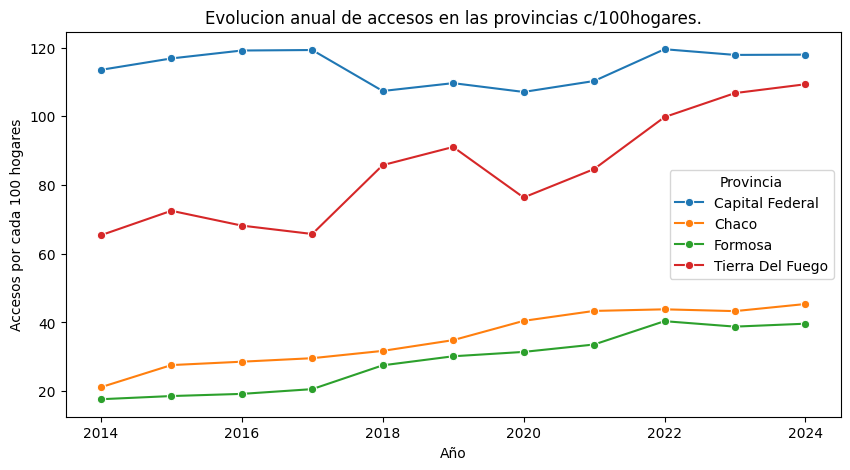

In [10]:
ph = pd.read_csv('../data/Penetracion-hogares.csv')

provincias_destacadas = ['Capital Federal', 'Tierra Del Fuego', 'Chaco', 'Formosa']
ph_destacado =ph[ph['Provincia'].isin(provincias_destacadas)]
# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=ph_destacado, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o', errorbar=None)
ax.set_title('Evolucion anual de accesos en las provincias c/100hogares.', fontsize=12)

plt.show()

## Conclusiones de Accesos en provincias por Hogar:

**Tierra del Fuego y Capital Federal:** estas provincias presentan una saturación en conectividad, pero su saturación es en tecnologías antiguas, lo que limita el acceso a internet de alta calidad. esto abre la posibilidad a nuevas inversiones en infraestructura tecnológica con posibilidad de reemplazo.

**Chaco y Formosa**, aunque con baja conectividad actual, representa una oportunidad para expandir la infraestructura y servicios. Invertir en estas provincias podría ofrecer un mayor retorno, por su potencial de aumento a largo plazo.